### Titanic Dataset - %97 Accuracy Score

**Import Requered Libraries

In [29]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 653.6 kB/s eta 0:02:33
   ---------------------------------------- 0.2/99.8 MB 2.1 MB/s eta 0:00:49
   ---------------------------------------- 0.5/99.8 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 0.7/99.8 MB 3.8 MB/s eta 0:00:26
   ---------------------------------------- 0.9/99.8 MB 3.9 MB/s eta 0:00:26
   ---------------------------------------- 1.2/99.8 MB 4.2 MB/s eta 0:00:24
    --------------------------------------- 1.5/99.8 MB 4.6 MB/s eta 0:00:22
    --------------------------------------- 1.7/99.8 MB 4.6 MB/s eta 0:00:22
    ---------------------------------

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix, ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [32]:
df = pd.read_excel("Data/Titanic_dataset.xlsx")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


#### Data Preprocessing

*Data Cleaning

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [34]:
df.shape

(1309, 14)

C:\Users\shimu\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


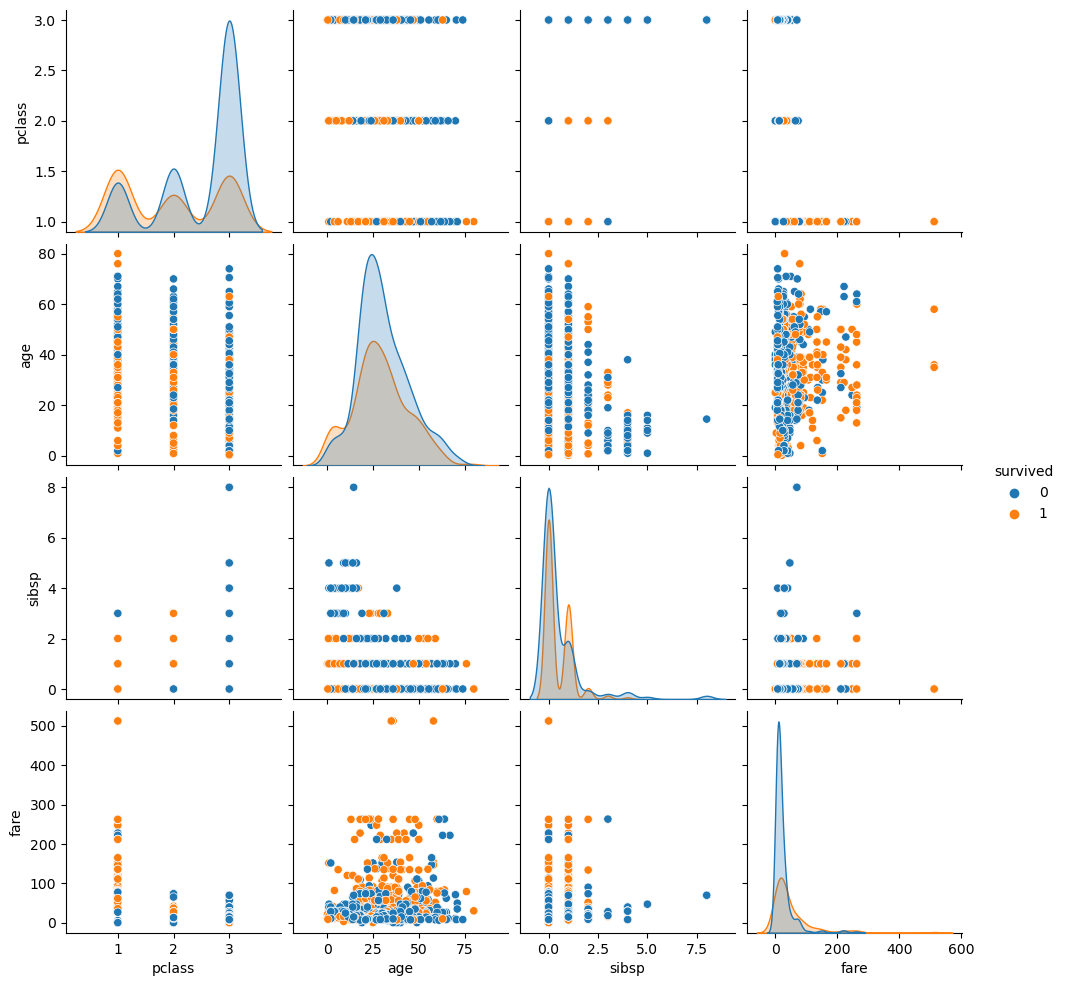

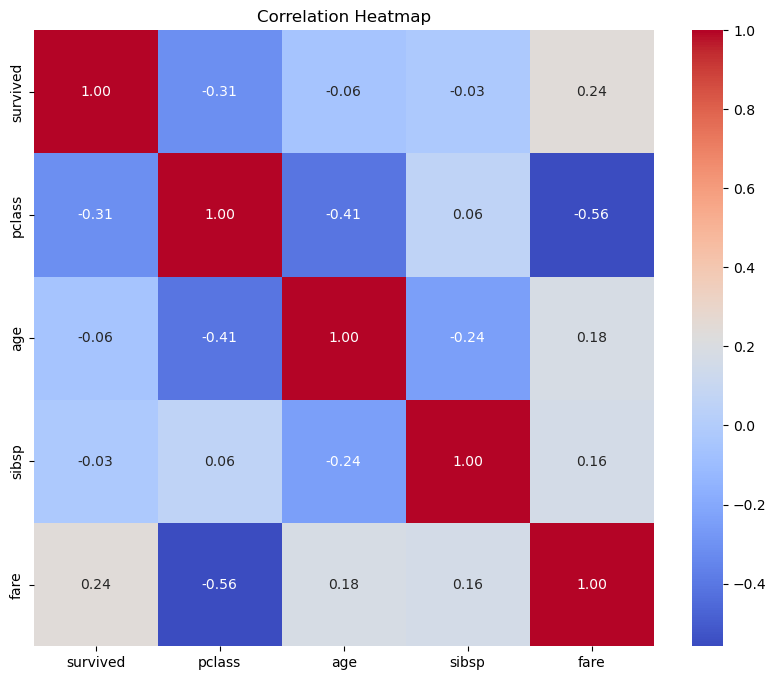

In [35]:
sns.pairplot(df[['survived', 'pclass', 'age', 'sibsp', 'fare']], hue='survived', diag_kind='kde')
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(df[['survived', 'pclass', 'age', 'sibsp', 'fare']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [36]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {len(unique_values)}")

Unique values in pclass: 3
Unique values in survived: 2
Unique values in name: 1307
Unique values in sex: 2
Unique values in age: 99
Unique values in sibsp: 7
Unique values in parch: 8
Unique values in ticket: 939
Unique values in fare: 282
Unique values in cabin: 187
Unique values in embarked: 4
Unique values in boat: 29
Unique values in body: 122
Unique values in home.dest: 370


**The 'name' column is used as an identifier, and since it is not necessary for our analysis, we can delete it.

In [37]:
df.drop('name', axis=1, inplace=True)

In [38]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Checking for null values in the data

In [39]:
pd.DataFrame(df).isnull().sum()

pclass          0
survived        0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

**Fill in missing values in the 'age' column with the mean value

In [40]:
df['age'].fillna(df['age'].mean(), inplace=True)

**In the 'fare' and 'embarked' columns, we are assigning the mode value to missing values.

In [41]:
mode_fare = df['fare'].mode()[0]
df['fare'].fillna(mode_fare, inplace=True)

mode_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(mode_embarked, inplace=True)

*To better and more accurately discern the distribution of null values in the 'Body' column, we will initially categorize the 'Age' column into groups such as 0-10, 10-20, 20-40, 40+. Subsequently, we will fill the null values in the 'Body' column based on the average of bodies within these grouped age ranges. Additionally, to account for the possibility that there may be a reason for the emptiness of these 'Body' values, we will assign a new column indicating whether these values were previously null.

In [42]:
age_bins = [0, 10, 20, 40, 200]
age_labels = ['0-10', '10-20', '20-40', '40+']

df['Age_Group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)
df['body_is_null'] = df['body'].isnull().astype(int)
age_group_means = df.groupby('Age_Group')['body'].mean()

for age_label, mean_body in age_group_means.items():
    df.loc[(df['Age_Group'] == age_label) & (df['body'].isnull()), 'body'] = mean_body
    
df.drop(columns=["Age_Group"],axis=1,inplace=True)

In [43]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,body_is_null
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,160.90625,"St Louis, MO",1
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,4.00000,"Montreal, PQ / Chesterville, ON",1
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,4.00000,"Montreal, PQ / Chesterville, ON",1
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.00000,"Montreal, PQ / Chesterville, ON",0
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,160.90625,"Montreal, PQ / Chesterville, ON",1


**NaN values in the 'cabin','boat' and 'home.dest' columns will be assigned as 'undefined'.

In [44]:
df['cabin'] = df['cabin'].fillna('undefined')
df['home.dest'] = df['home.dest'].fillna('undefined')
df['boat'] = df['boat'].fillna('undefined')

In [45]:
df.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,body_is_null
0,1,1,female,29.0000,0,0,24160,211.3375,B5,S,2,160.90625,"St Louis, MO",1
1,1,1,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,4.00000,"Montreal, PQ / Chesterville, ON",1
2,1,0,female,2.0000,1,2,113781,151.5500,C22 C26,S,undefined,4.00000,"Montreal, PQ / Chesterville, ON",1
3,1,0,male,30.0000,1,2,113781,151.5500,C22 C26,S,undefined,135.00000,"Montreal, PQ / Chesterville, ON",0
4,1,0,female,25.0000,1,2,113781,151.5500,C22 C26,S,undefined,160.90625,"Montreal, PQ / Chesterville, ON",1


In [46]:
pd.DataFrame(df).isnull().sum()

pclass          0
survived        0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin           0
embarked        0
boat            0
body            0
home.dest       0
body_is_null    0
dtype: int64

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pclass        1309 non-null   int64  
 1   survived      1309 non-null   int64  
 2   sex           1309 non-null   object 
 3   age           1309 non-null   float64
 4   sibsp         1309 non-null   int64  
 5   parch         1309 non-null   int64  
 6   ticket        1309 non-null   object 
 7   fare          1309 non-null   float64
 8   cabin         1309 non-null   object 
 9   embarked      1309 non-null   object 
 10  boat          1309 non-null   object 
 11  body          1309 non-null   float64
 12  home.dest     1309 non-null   object 
 13  body_is_null  1309 non-null   int32  
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 138.2+ KB


**As we can see in the data, most features are of type object.We will convert the data type of object-type variables to integer here.

In [48]:
def detect_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    return categorical_columns
def encode_categorical_columns(df):
    categorical_columns = detect_categorical_columns(df)
    le = LabelEncoder()
    df_encoded = df.copy()

    for col in categorical_columns:
        df_encoded[col] = df[col].astype(str)  
        df_encoded[col] = le.fit_transform(df_encoded[col])

    return df_encoded

In [49]:
df_encoded = encode_categorical_columns(df)
df_encoded.head()

,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,body_is_null
0,1,1,0,29.0000,0,0,187,211.3375,43,2,11,160.90625,308,1
1,1,1,1,0.9167,1,2,49,151.5500,79,2,2,4.00000,230,1
2,1,0,0,2.0000,1,2,49,151.5500,79,2,27,4.00000,230,1
3,1,0,1,30.0000,1,2,49,151.5500,79,2,27,135.00000,230,0
4,1,0,0,25.0000,1,2,49,151.5500,79,2,27,160.90625,230,1


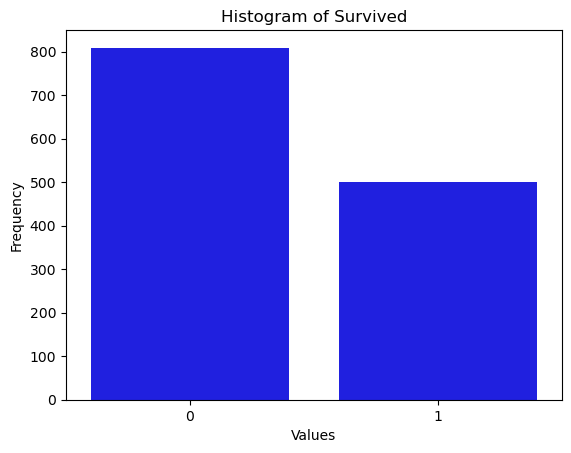

In [50]:
sns.countplot(df_encoded, x="survived",color="blue")
plt.title('Histogram of Survived')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

####  Build Models

In [51]:
y=df_encoded.survived.values
X=df_encoded.drop(columns=["survived"])
train_X,test_X,train_y,test_y=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [52]:

models = [
    ('Logistic Regression', LogisticRegression(), {'classifier__C': [ 0.01, 0.1, 1, 10]}),
    ('Random Forest', RandomForestClassifier(), {'classifier__n_estimators': [50, 100, 200, 500,1000], 'classifier__max_depth': [None, 5, 10, 15, 20,50]}),
    ('Decision Tree', DecisionTreeClassifier(), {'classifier__max_depth': [None, 5, 10, 15, 20], 'classifier__min_samples_split': [2, 5, 10]}),
    ('Naive Bayes', GaussianNB(), {}),
    ('XGBoost', XGBClassifier(), {'classifier__n_estimators': [50, 100, 200, 500,1000], 'classifier__learning_rate': [0.01, 0.1, 0.5, 1.0], 'classifier__max_depth': [3, 5, 7, 9]}),
    ('SVM', SVC(), {'classifier__C': [ 0.01, 0.1, 1, 10 ], 'classifier__kernel': ['linear', 'rbf']})
]
best_models={}
for name, model, param_grid in models:
    pipeline = Pipeline([
        ('classifier', model)
    ])
    grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring="accuracy")
    grid_search.fit(train_X, train_y)
    print("Model: ", name)
    print("Best Parameters:", grid_search.best_params_)
    pred_y = grid_search.predict(test_X)
    acc = accuracy_score(test_y, pred_y)
    print("Accuracy  Score of Prediction:", acc)
    print()
    print("-" * 40)
    best_models[name] = {'model': grid_search.best_estimator_, 'params': grid_search.best_params_,"acc":acc}

C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\shimu\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Model:  Logistic Regression
Best Parameters: {'classifier__C': 1}
Accuracy  Score of Prediction: 0.916030534351145

----------------------------------------
Model:  Random Forest
Best Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Accuracy  Score of Prediction: 0.9656488549618321

----------------------------------------
Model:  Decision Tree
Best Parameters: {'classifier__max_depth': 5, 'classifier__min_samples_split': 10}
Accuracy  Score of Prediction: 0.9618320610687023

----------------------------------------
Model:  Naive Bayes
Best Parameters: {}
Accuracy  Score of Prediction: 0.9083969465648855

----------------------------------------
Model:  XGBoost
Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 50}
Accuracy  Score of Prediction: 0.9656488549618321

----------------------------------------
Model:  SVM
Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'linear'}
Accuracy  Score of

Best Model: Random Forest
Best Parameters: {'classifier__max_depth': 5, 'classifier__n_estimators': 50}
Best Accuracy: 0.9656488549618321
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.97      0.94      0.95       100

    accuracy                           0.97       262
   macro avg       0.97      0.96      0.96       262
weighted avg       0.97      0.97      0.97       262



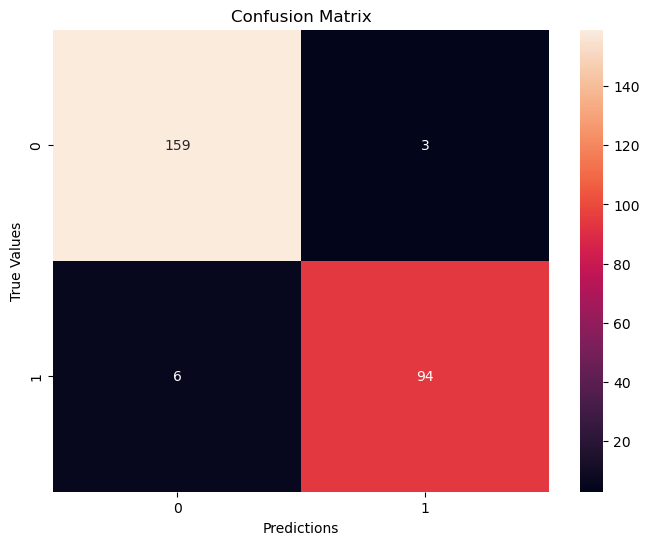

In [53]:
best_model_info = max(best_models.items(), key=lambda x: x[1]['acc'])
best_model_name, best_model_info = best_model_info

best_model = best_model_info['model']
best_params = best_model_info['params']
best_accuracy = best_model_info['acc']

print(f"Best Model: {best_model_name}")
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)

y_pred_best = best_model.predict(test_X)
print("Classification Report:")
print(classification_report(test_y, y_pred_best))
cm = confusion_matrix(test_y,y_pred_best,labels=[0, 1])


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predictions')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()